# Coupon Acceptance Analysis
This project analyzes customer behavior in response to driving coupons based on several factors like destination, passenger type, time, weather, and coupon type. Using visualizations and probability distributions, we explore what influences a customer's decision to accept a coupon.

## Problem Statement
We aim to investigate what factors influence a customer's likelihood of accepting a coupon while driving. We will explore different coupon types, including bar coupons, to understand the demographic and situational factors that play a role in coupon acceptance.

## Data Description
The data is collected via a survey that captures different driving scenarios and asks whether the customer would accept a coupon. It contains the following attributes:

- **User attributes** (e.g., gender, age, marital status)
- **Contextual attributes** (e.g., weather, time, passenger type)
- **Coupon attributes** (e.g., type of coupon, expiration)
The target variable is `Y`, where `Y=1` indicates coupon acceptance and `Y=0` indicates rejection.

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('coupons.csv')

# Check for missing data
missingData = data.isnull().sum()
missingData

# Handling Missing Data
We will fill missing values in the categorical columns with the most common value 0.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('coupons.csv')

# Fill missing values with mode
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])
data['car'] = data['car'].fillna('Unknown')

# Verifying missing data is handled
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

## Exploratory Data Analysis
### Coupon Acceptance Rate
We will first calculate the proportion of the total observations that accepted the coupon (Y=1).

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('coupons.csv')

# Coupon acceptance rate
couponAcceptanceRate = data['Y'].mean()
print(f'Overall Coupon Acceptance Rate: {couponAcceptanceRate * 100:.2f}%')

Overall Coupon Acceptance Rate: 56.84%


### Visualizing Coupon Acceptance
We will use a bar plot to visualize how many people accepted and rejected the coupon.

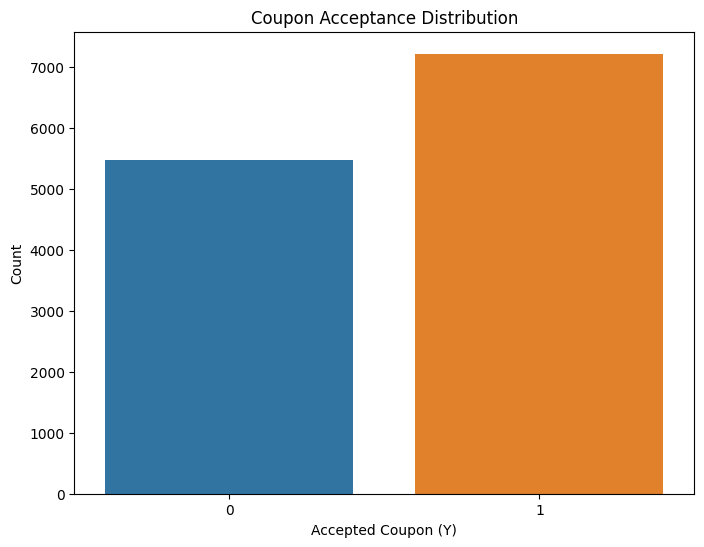

In [19]:
# Bar plot for coupon acceptance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('coupons.csv')

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Y')
plt.title('Coupon Acceptance Distribution')
plt.xlabel('Accepted Coupon (Y)')
plt.ylabel('Count')
plt.show()

### Temperature Distribution
We will create a histogram to visualize the distribution of temperatures in the dataset.

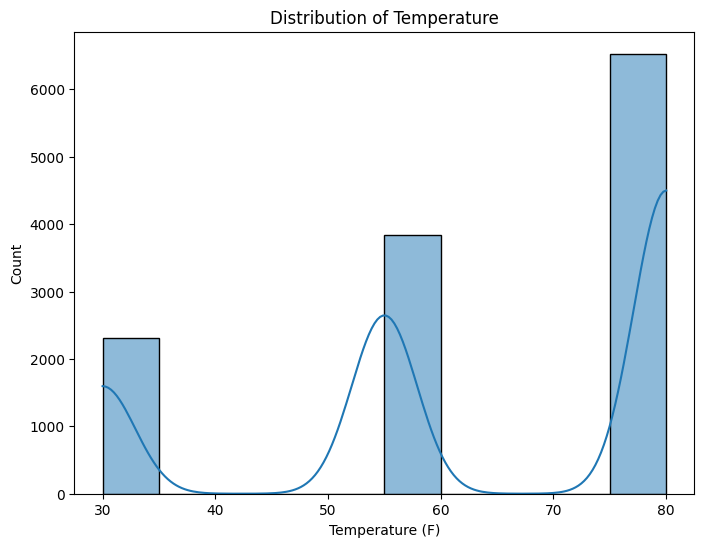

In [21]:
# Histogram for temperature distribution
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('coupons.csv')

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='temperature', bins=10, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.show()

## Investigating Bar Coupons
We will now create a new DataFrame containing only the bar coupons and analyze the acceptance rates based on different factors.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('coupons.csv')
# Filtering for bar-related coupons
barCoupons = data[data['coupon'] == 'Bar']

# Bar coupon acceptance rate
barCouponAcceptRate = barCoupons['Y'].mean()
print(f'Bar Coupon Acceptance Rate: {barCouponAcceptRate * 100:.2f}%')

Bar Coupon Acceptance Rate: 41.00%


### Acceptance Based on Bar Visit Frequency
We'll compare the acceptance rates for those who visit bars 3 or fewer times a month to those who visit more often.

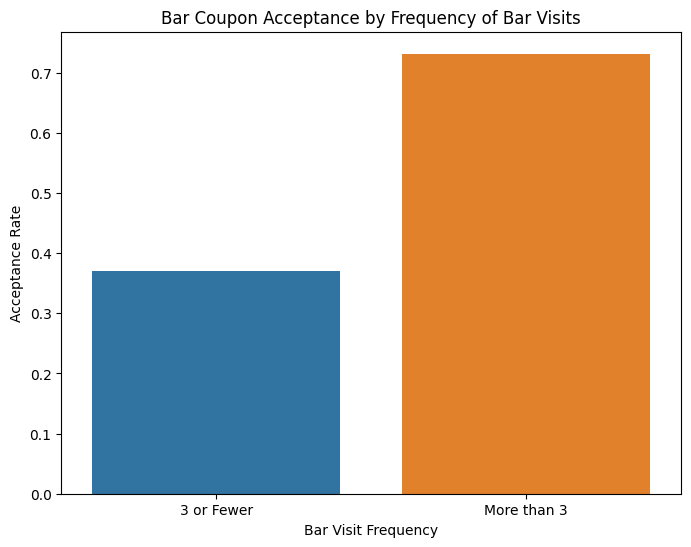

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('coupons.csv')

# Categorize bar visit frequency
barCoupons['Bar_Frequency'] = barCoupons['Bar'].apply(lambda x: '3 or Fewer' if x in ['never', 'less1', '1~3'] else 'More than 3')
acceptBarFreq = barCoupons.groupby('Bar_Frequency')['Y'].mean()

# Plot bar visit frequency acceptance rates
plt.figure(figsize=(8, 6))
sns.barplot(x=acceptBarFreq.index, y=acceptBarFreq.values)
plt.title('Bar Coupon Acceptance by Frequency of Bar Visits')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.show()

### Acceptance for Drivers Over 25 Who Visit Bars Frequently
Next, we compare acceptance rates for drivers who are over 25 and visit bars more than once a month.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('coupons.csv')

# Acceptance rate for over 25 and frequent bar-goers
over25FreqBars = barCoupons[(barCoupons['age'] != 'below21') & (barCoupons['Bar'] != 'never')]
over25FreqBarsRate = over25FreqBars['Y'].mean()
print(f'Acceptance Rate for Drivers Over 25 and Frequent Bar-goers: {over25FreqBarsRate * 100:.2f}%')

Acceptance Rate for Drivers Over 25 and Frequent Bar-goers: 56.74%


## Conclusions and Recommendations
### Key Findings
- **Overall Coupon Acceptance Rate**: 56.84%
- **Bar Coupon Acceptance Rate**: 41.00%
- Frequent bar-goers (those visiting more than 3 times a month) have a significantly higher acceptance rate.
- Drivers over 25 who frequently visit bars are more likely to accept bar coupons.

### Recommendations
- Target frequent bar-goers and those over the age of 25 with bar-related coupons.
- Adjust marketing strategies based on the data to better target potential customers.